<a href="https://colab.research.google.com/github/BearDimonR/ML_Competitions/blob/main/Corrupted_Mars_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![AIcrowd-Logo](https://images.aicrowd.com/raw_images/challenges/banner_file/766/14ef10da78a568e6e546.jpg)


# Getting Started Code for [Image Correction Challenge](https://www.aicrowd.com/challenges/ai-blitz-7/problems/image-correction) on AIcrowd
#### Author : Shubhamai

## Download Necessary Packages 📚

In [ ]:
!pip install -U aicrowd-cli

  Running command git clone -q https://gitlab.aicrowd.com/yoogottamk/aicrowd-cli.git /tmp/pip-req-build-lqs64htb
The aicrowd.magic extension is already loaded. To reload it, use:
  %reload_ext aicrowd.magic


## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [ ]:
API_KEY = "a56e8d8454a6f1379606d0ced67ea04c"
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
!aicrowd dataset download --challenge image-correction -j 3

In [ ]:
!rm -rf data
!mkdir data


!unzip train.zip -d data/train >/dev/null
!unzip val.zip -d data/val >/dev/null
!unzip test.zip -d data/test >/dev/null
!unzip sample_submission.zip -d data/sample_submission >/dev/null


## Import packages

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from glob import glob
import random
from tqdm.notebook import tqdm 

## Load Data

In [ ]:
data_directiory = "data"
test_data_path = os.path.join(data_directiory, "test/Corrupted_Images")
test_submission_path = "Labels"

## Visualize the data 👀

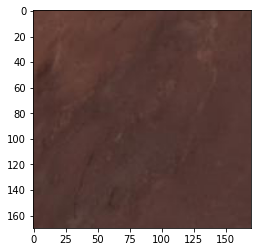

In [ ]:

img = plt.imread(test_data_path+"/0/start_image.jpg")
plt.imshow(img)

# Making a Random Submission

In [ ]:
!rm -rf Labels
!mkdir Labels

In [ ]:
# Output Image Width & hight
image_width, image_height = 512, 512

# Getting though corrupted images folder
for img_folder_name in tqdm(os.listdir(test_data_path)):

    # Getting all corrupted images name from the corrupted images folder
    img_folder_path = os.path.join(test_data_path, img_folder_name)

    # Creating a new blank image
    prediction = Image.new("RGBA",(image_width, image_height)) 

    # Groung though each corrupted image
    for _currupted_img_name in glob(os.path.join(img_folder_path, "*.jpg")):
        
        # Opening corrupted image
        currupted_im = Image.open(_currupted_img_name)
        pp_width, pp_height = currupted_im.size

        # Find Random location to paste the corrupted image into the blank image
        random_x = random.randint(0, image_width - pp_width)
        random_y = random.randint(0, image_height - pp_height)

        # pasting the corrupted image into the blank imagee
        prediction.paste(currupted_im, (random_x, random_y))

    # Saving the output image :)
    prediction.convert("RGB").save(os.path.join(test_submission_path, f"{img_folder_name}.jpg"))        

## Save the prediction to zip

In [ ]:
!zip submission.zip -r Labels > /dev/null

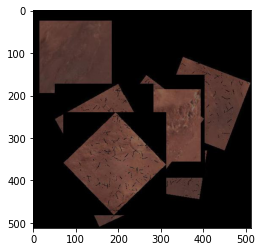

In [ ]:
sample_output_img = plt.imread(os.path.join(test_submission_path, f"0.jpg"))
plt.imshow(sample_output_img)

## Making direct submission thought aicrowd-cli

In [ ]:
!aicrowd submission create -c image-correction -f submission.zip

submission.zip ━━━━━━━━━━━━━━━━━━━━ 100.0% • 131.5/131.5 MB • 2.4 MB/s • 0:00:00
                                                 ╭─────────────────────────╮                                                  
                                                 │ Successfully submitted! │                                                  
                                                 ╰─────────────────────────╯                                                  
                                                       Important links                                                        
┌──────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-7/problems/image-correction/submissions/125911              │
│                  │                                                                                                         │
│  All submissions │ https://w